<a href="https://colab.research.google.com/github/biwanun1690/Data_science_basic_24_25_group_2/blob/main/%D0%9A%D1%83%D0%BF%D1%80%D0%B8%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0_%D0%90%D0%BD%D0%BD%D0%B0_10%D0%9B_2_%D0%B2%D0%B0%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа **EDA**

## **Основные характеристики:**

Температура (°C): Средняя температура региона.

Влажность (%): Относительная влажность, зарегистрированная в регионе.

Концентрация PM2.5 (мкг/м³): Уровни мелких твердых частиц.

Концентрация PM10 (мкг/м³): Уровни крупных твердых частиц.

Концентрация NO2 (ppb): Уровни диоксида азота.

Концентрация SO2 (ppb): Уровни диоксида серы.

Концентрация CO (ppm): Уровни оксида углерода.

Близость к промышленным зонам (км): Расстояние до ближайшей
промышленной зоны.

Плотность населения (чел./км²): Количество людей на
квадратный километр в регионе.


Уровни качества воздуха:

Хорошее (Good): Чистый воздух с низким уровнем загрязнения.

Умеренный (Moderate): Приемлемое качество воздуха, но присутствуют некоторые загрязняющие вещества.

Плохой (Poor): Заметное загрязнение, которое может вызвать проблемы со здоровьем у чувствительных групп.

Опасный (Hazardous): Сильно загрязненный воздух, представляющий серьезные риски для здоровья населения.

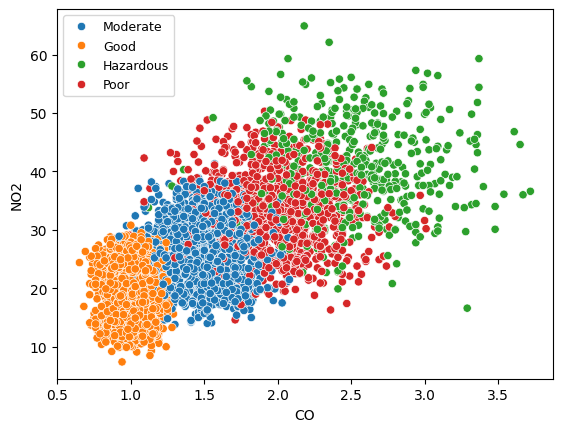

In [41]:
# График 1 - NO2(CO) по Air Quality
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r

df = pd.read_csv("pollution_dataset.csv")
air_qualites = {'Good': 'green', 'Moderate': 'royalblue', 'Poor': 'yellow', 'Hazardous': 'red'}
fig, ax = plt.subplots()

sns.scatterplot(df, x=df['CO'], y=df['NO2'], hue='Air Quality')
plt.xlabel('CO')
plt.ylabel('NO2')

plt.legend(fontsize=9)

plt.show()

<ipython-input-25-84fb97219264>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axes[0, 1] = sns.distplot(df['Population_Density'],
<ipython-input-25-84fb97219264>:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axes[1, 0] = sns.distplot(df['Temperature'],
<ipython-input-25-84fb97219264>:39: UserWarning: 

`distplot`

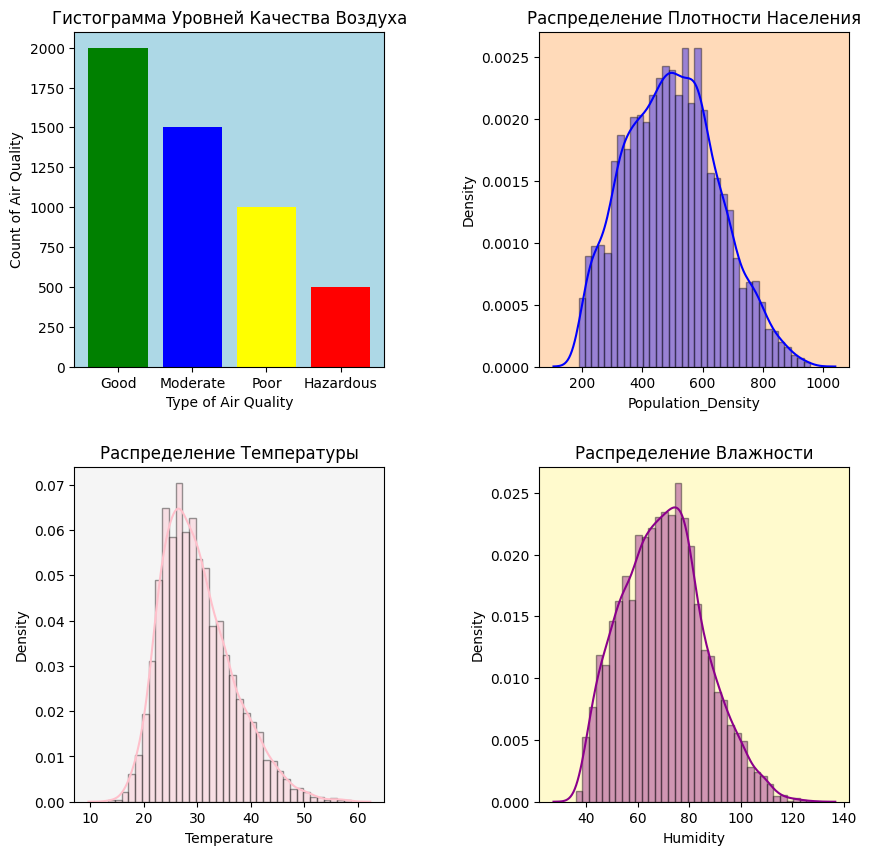

In [25]:
# График 2 - NO2(CO) по Air Quality
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
import seaborn as sns

df = pd.read_csv("pollution_dataset.csv")

fig, axes = plt.subplots(2,2)
fig.set_figwidth(10)
fig.set_figheight(10)
######################################################################################################################
airs = pd.Series(df['Air Quality']).value_counts()
axes[0, 0].bar(
    airs.index,
    airs.values,
    color = ['green', 'blue', 'yellow', 'red'],
)
axes[0, 0].set_xlabel('Type of Air Quality', fontsize=10)
axes[0, 0].set_ylabel('Count of Air Quality', fontsize=10)
axes[0, 0].set_title('Гистограмма Уровней Качества Воздуха', fontsize=12)
axes[0,0].set_facecolor('lightblue')
######################################################################################################################
axes[0, 1] = sns.distplot(df['Population_Density'],
             bins=36, color = 'blue',
             hist_kws={'edgecolor':'black'},
             ax=axes[0, 1])
axes[0, 1].set_title('Распределение Плотности Населения', fontsize=12)
axes[0, 1].set_facecolor('peachpuff')
######################################################################################################################
axes[1, 0] = sns.distplot(df['Temperature'],
             bins=36, color = 'pink',
             hist_kws={'edgecolor':'black'},
             ax=axes[1, 0])
axes[1, 0].set_title('Распределение Температуры', fontsize=12)
axes[1, 0].set_facecolor('whitesmoke')
######################################################################################################################
axes[1, 1] = sns.distplot(df['Humidity'],
             bins=36, color = 'darkmagenta',
             hist_kws={'edgecolor':'black'},
             ax=axes[1, 1])
axes[1, 1].set_title('Распределение Влажности', fontsize=12)
axes[1, 1].set_facecolor('lemonchiffon')
######################################################################################################################
plt.subplots_adjust(hspace=0.3, wspace=0.5)
plt.show()

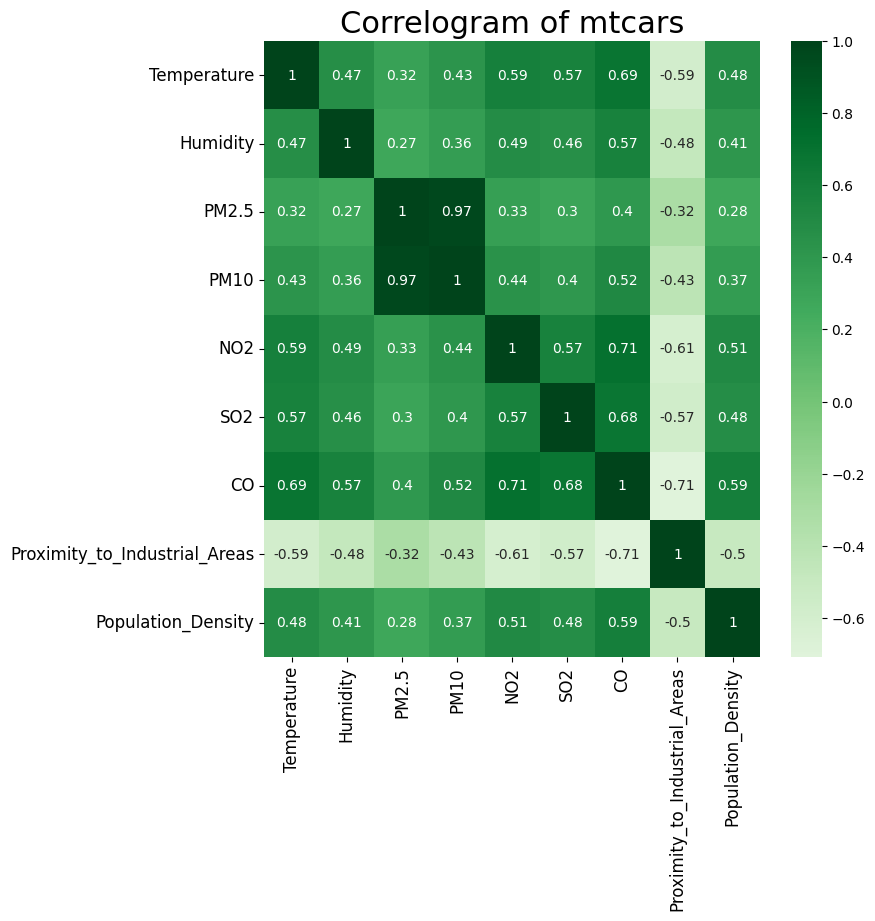

In [27]:
# График 3 - Матрица корреляции -> heatmap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
import seaborn as sns

df = pd.read_csv("pollution_dataset.csv")

plt.figure(figsize=(8,8))

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cmap='Greens', center=0, annot=True)
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

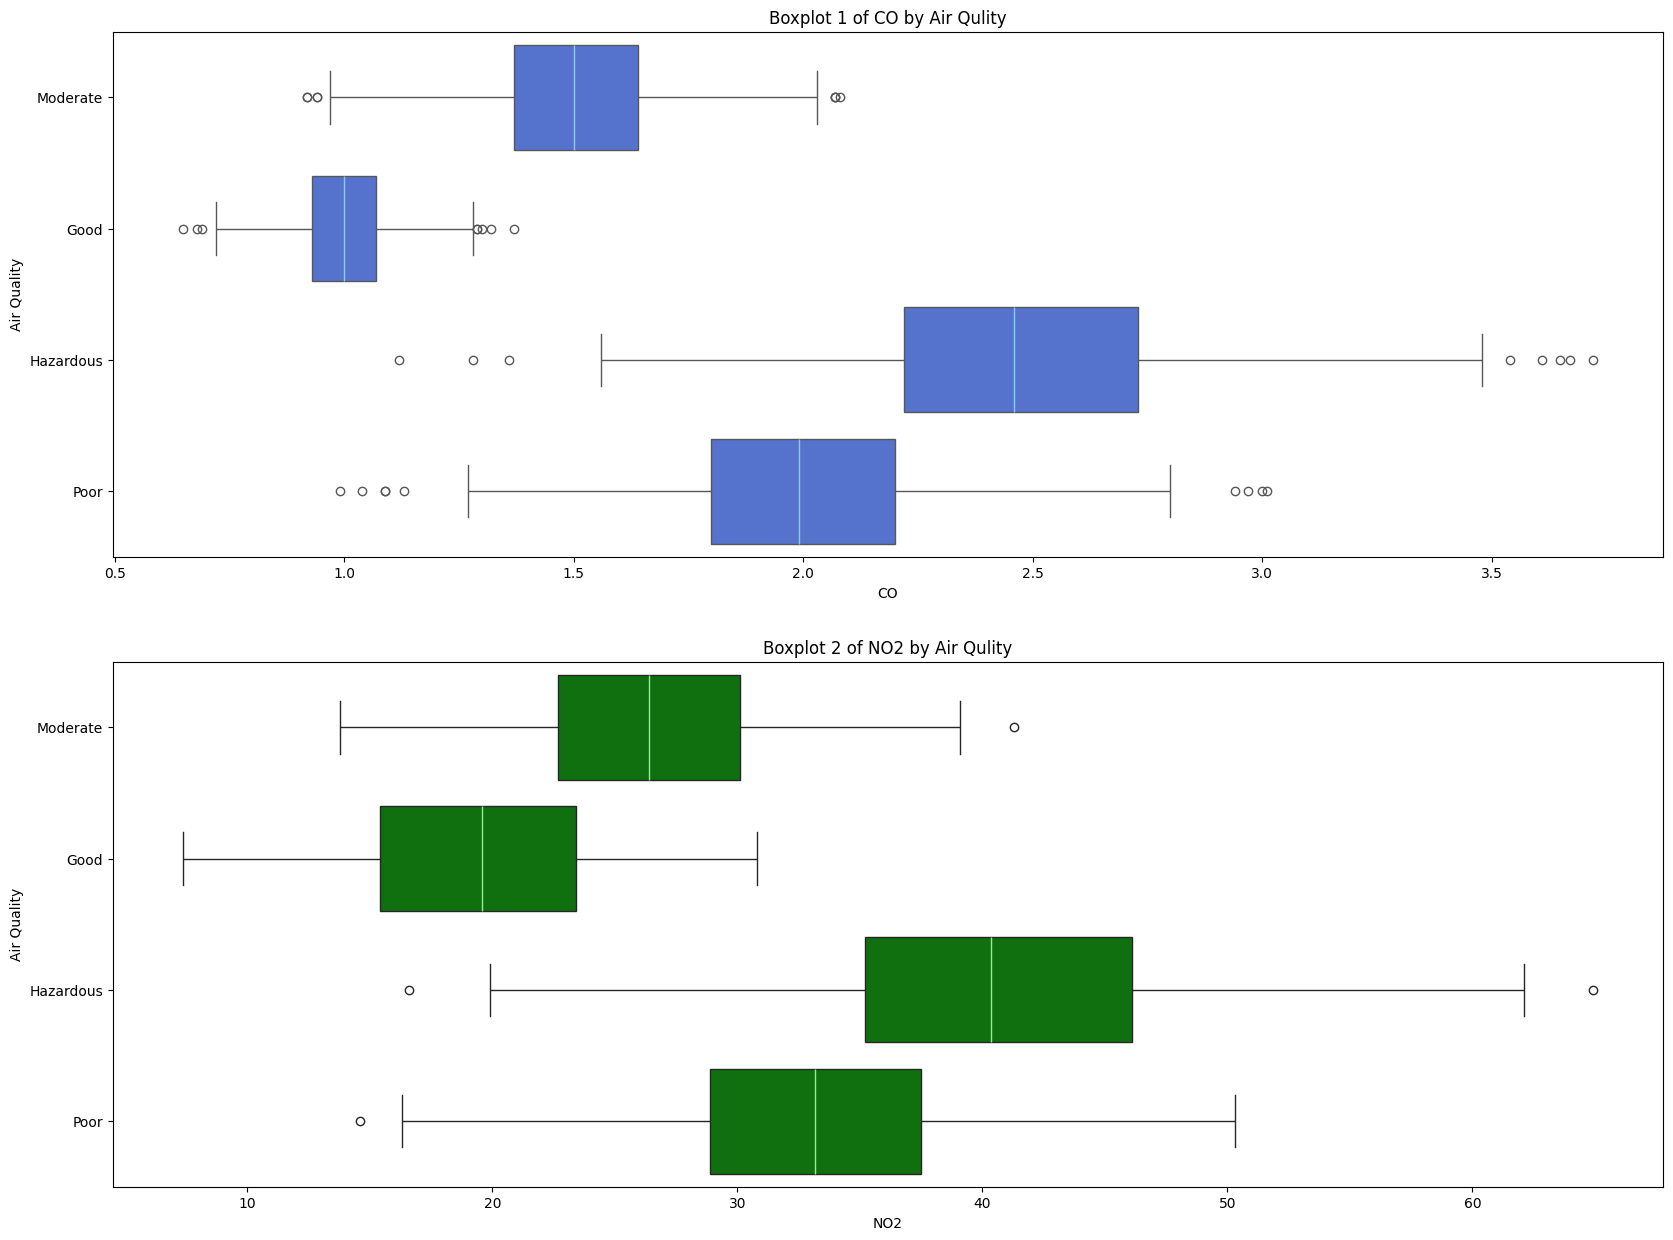

In [144]:
# График 4 - boxplot
# 1) CO с учетом переменной Air Quality
# 2) NO2 с учетом переменной Air Quality

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
import seaborn as sns

df = pd.read_csv("pollution_dataset.csv")

fig, axes = plt.subplots(2,1)
fig.set_figwidth(20)
fig.set_figheight(15)

sns.boxplot(y='Air Quality', x='CO', data=df, color='royalblue', medianprops=dict(color='skyblue'), ax=axes[0])
axes[0].set_title('Boxplot 1 of CO by Air Qulity', fontsize=12)
axes[0].set_ylabel('Air Quality')
axes[0].set_xlabel('CO')
######################################################################################################################
sns.boxplot(y='Air Quality', x='NO2', data=df, color='green', medianprops=dict(color='lightgreen'), ax=axes[1])
axes[1].set_title('Boxplot 2 of NO2 by Air Qulity', fontsize=12)
axes[1].set_ylabel('Air Quality')
axes[1].set_xlabel('NO2')

plt.show()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


Text(0.5, 1.0, 'Пропуски в данных')

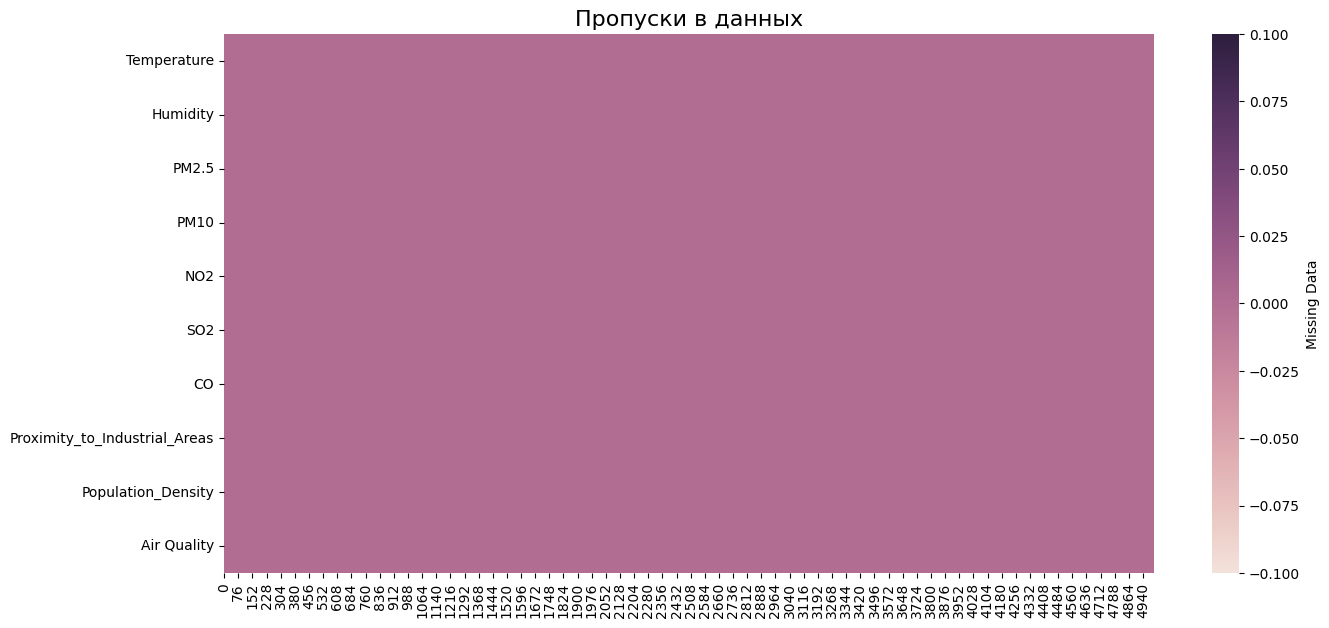

In [161]:
# График 5 - heatmap для отображения пропусков в данных

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
import seaborn as sns

df = pd.read_csv("pollution_dataset.csv")


plt.figure(figsize=(15,7))
print(df.isna().sum())
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(df.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'}, color='red')
plt.title('Пропуски в данных', fontsize=16)

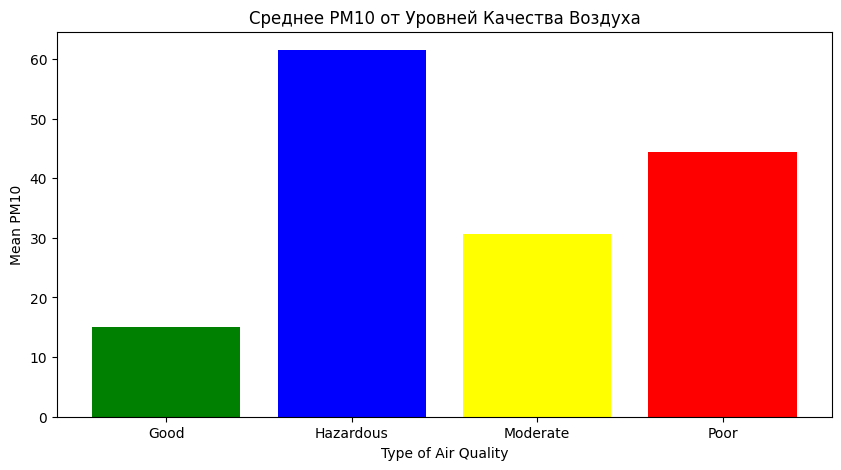

In [22]:
# График 6 - график среднего значения PM10 от Air Quality
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
import seaborn as sns

df = pd.read_csv("pollution_dataset.csv")
plt.figure(figsize=(10,5))

plt.bar(
    np.unique(df['Air Quality'].values),
    [df[df['Air Quality'] == type]['PM10'].mean() for type in np.unique(df['Air Quality'].values)],
    color = ['green', 'blue', 'yellow', 'red'],
)
plt.ylabel('Mean PM10', fontsize=10)
plt.xlabel('Type of Air Quality', fontsize=10)
plt.title('Среднее PM10 от Уровней Качества Воздуха', fontsize=12)
plt.show()

<ipython-input-56-c108cd5f4ff5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig1 = sns.violinplot(
<ipython-input-56-c108cd5f4ff5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


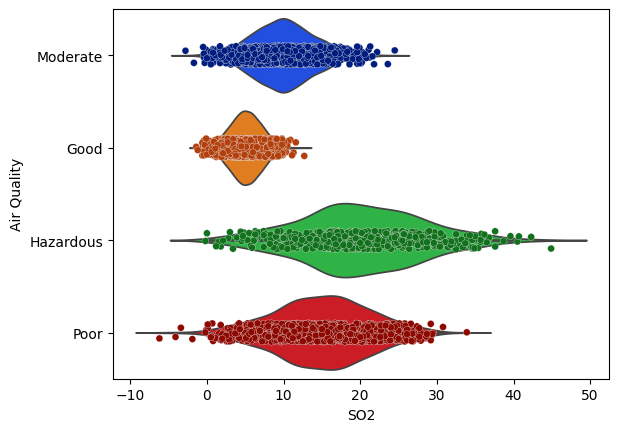

In [56]:
# График 7 - мой график
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
import seaborn as sns

df = pd.read_csv("pollution_dataset.csv")
fig = plt.figure()
fig1 = sns.violinplot(
    x='SO2',
    y='Air Quality',
    data=df,
    palette='bright')

sns.stripplot(
    x='SO2',
    y='Air Quality',
    data=df,
    palette='dark',
    linewidth=0.2,
    edgecolor='white',
    ax=fig1)

plt.show()